For the Documentation from bleow projecct click the link below-
https://docs.google.com/document/d/1oBLwKHpVasL_5G3q9Dumc1oNQMWRlHNZ3Ukv7-CSq1U/edit?usp=sharing

# **Contents of this Project**
* EDA.
* ML Modeling.
* Hypothisis.
* SQL Based Questions.

# **Introduction:**

In the dynamic landscape of the financial industry, the evaluation and approval of credit card applications play a pivotal role in determining the risk and profitability for lending institutions. The Credit Card Approval dataset forms the foundation for this machine learning project, offering a comprehensive exploration into the factors influencing the approval or rejection of credit card applications.

### Background:

Credit card approval is a multifaceted process that involves assessing an applicant's creditworthiness based on various financial and personal attributes. Traditional methods often rely on static rules and thresholds, but the emergence of machine learning introduces an opportunity to enhance the accuracy and efficiency of this decision-making process. By leveraging historical data and advanced algorithms, financial institutions can better predict which applicants are likely to be responsible credit users.

### Dataset Overview:

The Credit Card Approval dataset provides a diverse set of features, including but not limited to income, employment status, existing debt, and credit history. These features encapsulate a wealth of information that, when analyzed and modeled effectively, can contribute to the creation of a robust credit card approval prediction system. The dataset is a snapshot of real-world applications, allowing machine learning models to learn patterns and relationships that influence credit card approval outcomes.

### Project Objectives:

1. **Predictive Modeling:** The primary objective of this machine learning project is to build predictive models that can effectively assess an applicant's creditworthiness based on the provided features.

2. **Risk Management:** Enhance risk management practices by developing models that can accurately identify high-risk applicants, reducing the likelihood of defaults and financial losses.

3. **Operational Efficiency:** Implement machine learning models to streamline the credit approval process, allowing financial institutions to make faster and more informed decisions.

4. **Fairness and Transparency:** Strive for fairness and transparency in credit card approval decisions, ensuring that models are free from biases and treat all applicants equitably.

### Significance:

The outcomes of this project hold significance for both financial institutions and credit applicants. By harnessing the power of machine learning, we aim to create models that not only enhance the efficiency of credit card approval processes but also contribute to fair and responsible lending practices.

Through thorough analysis and model development, this project seeks to address the challenges of credit risk assessment, ultimately facilitating more informed and equitable credit card approval decisions in the ever-evolving financial landscape.

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
df = pd.read_csv('/content/Credit_card.csv') # Loding the dataset credit_card

In [ ]:
df_label = pd.read_csv('/content/Credit_card_label.csv') # Loding the dataset credit_card_label

In [ ]:
ccdf = pd.merge(df, df_label, on='Ind_ID', how='inner')

In [ ]:
ccdf.to_csv('Credit_card_merged.csv')

In [ ]:
df = pd.read_csv('/content/Credit_card_merged.csv')

# **Basic Exploration Of Data**

In [ ]:
df.head(2) #Chaecking Top 5 records of dataset

,Unnamed: 0,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df.tail(2) #Chaecking bottom 5 records of dataset

,Unnamed: 0,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1546,1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [ ]:
credit = df.copy() # MAking a copy of dataset
credit.head(1)

,Unnamed: 0,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1


In [ ]:
credit.shape #Check the row and columns

(1548, 20)

The dataset contains 1548 rows and 20 columns. Each row of the dataset contains information about one customer.

Our objective is to Utilize machine learning approaches to predict credit card approval based on customer information. If we can do so for the historical data, then we should able to pridict credit card approval for new customers too, simply by asking for information like their annula income, education, housig type and employed days.

In [ ]:
credit.nunique() # nunique function give count of unique values in each column

Unnamed: 0         1548
Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [ ]:
#There are missing values present in few columns
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1548 non-null   int64  
 1   Ind_ID           1548 non-null   int64  
 2   GENDER           1541 non-null   object 
 3   Car_Owner        1548 non-null   object 
 4   Propert_Owner    1548 non-null   object 
 5   CHILDREN         1548 non-null   int64  
 6   Annual_income    1525 non-null   float64
 7   Type_Income      1548 non-null   object 
 8   EDUCATION        1548 non-null   object 
 9   Marital_status   1548 non-null   object 
 10  Housing_type     1548 non-null   object 
 11  Birthday_count   1526 non-null   float64
 12  Employed_days    1548 non-null   int64  
 13  Mobile_phone     1548 non-null   int64  
 14  Work_Phone       1548 non-null   int64  
 15  Phone            1548 non-null   int64  
 16  EMAIL_ID         1548 non-null   int64  
 17  Type_Occupatio

Looks like some columns are of integer and some of string. Some of the columns contain missing values, which we need to taken care of!

In [ ]:
credit.drop_duplicates() #drop_duplicate will drop all duplicate records

,Unnamed: 0,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [ ]:
# Also I am dropping the unrelevent columns
credit =credit.drop(['Unnamed: 0',"Ind_ID","Mobile_phone","Work_Phone","Phone","EMAIL_ID"], axis=1)


In [ ]:
credit.head(1)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1


In [ ]:
credit.shape

(1548, 14)

In [ ]:
# exploring all rows and columns
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#display(credit)

In [ ]:
# Converting Birthday_count to Age in Years
credit["Age_Years"] = abs(credit["Birthday_count"]) / 365.25  # Considering leap years
credit["Age_Years"] = credit["Age_Years"].round(1)

In [ ]:
# Converting Employed_days to Years
credit["Employed_Years"] = (credit["Employed_days"]) / 365.25  # Considering leap years
credit["Employed_Years"] = credit["Employed_Years"].round(1)

In [ ]:
credit =credit.drop(["Birthday_count","Employed_days"], axis=1)

In [ ]:
credit.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,Family_Members,label,Age_Years,Employed_Years
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,NaN,2,1,51.4,1000.0
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2,1,37.1,-1.6
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2,1,NaN,-1.6
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,NaN,2,1,37.1,-1.6
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,2,1,37.1,-1.6


## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "label" other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [ ]:
# Variables count in features
gender_counts = credit['GENDER'].value_counts()
Type_Income_counts = credit['Type_Income'].value_counts()
Type_Occupation_counts = credit['Type_Occupation'].value_counts()
Approval_counts = credit['label'].value_counts()

# Display the result
print('gender_counts',gender_counts)
print('\nType_Income_counts',Type_Income_counts)
print('\nType_Occupation_counts',Type_Occupation_counts)
print('\nApproval_counts',Approval_counts)

gender_counts F    973
M    568
Name: GENDER, dtype: int64

Type_Income_counts Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64

Type_Occupation_counts Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

Approval_counts 0    1373
1     175
Name: label, dtype: int64


<ipython-input-153-85d2a19fdd2d>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Annual_income', ylabel='Density'>

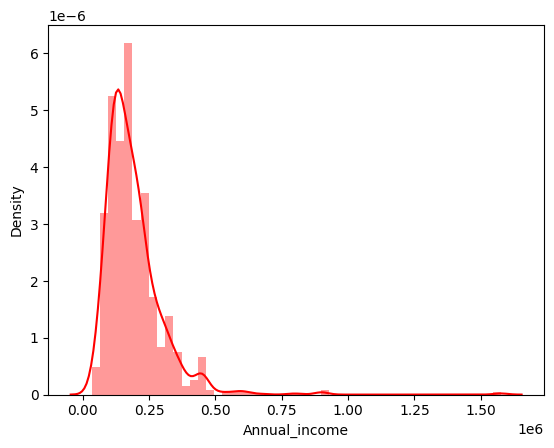

In [ ]:
#Checking the disribution of Income
import seaborn as sns
sns.distplot(credit['Annual_income'],color='red')

Form annual income column we see that maximum customer of bank belongs to lower income range, there are very few how have higher income.

<ipython-input-154-9c7afa897fce>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-154-9c7afa897fce>:7: UserWarning:


The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.

<ipython-input-154-9c7afa897fce>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-154-9c7afa897fce>:7: UserWarning:


The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.

<ipython-input-154-9c7afa897fce>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipytho

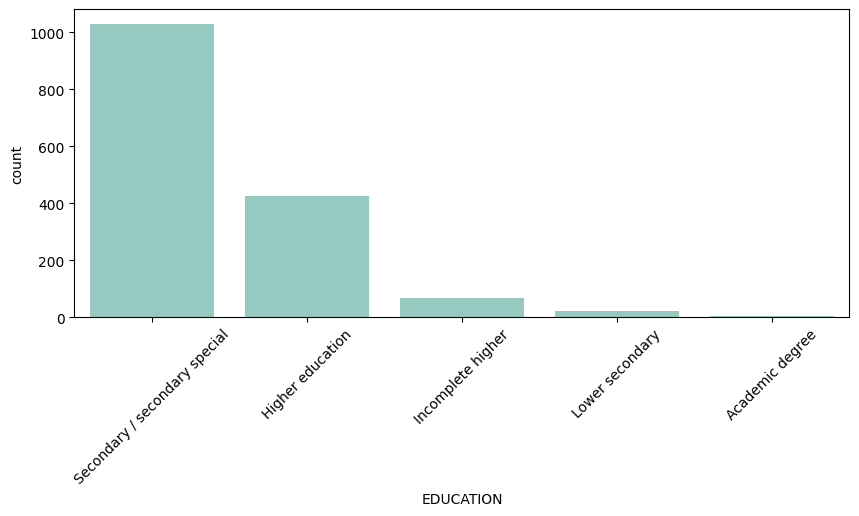

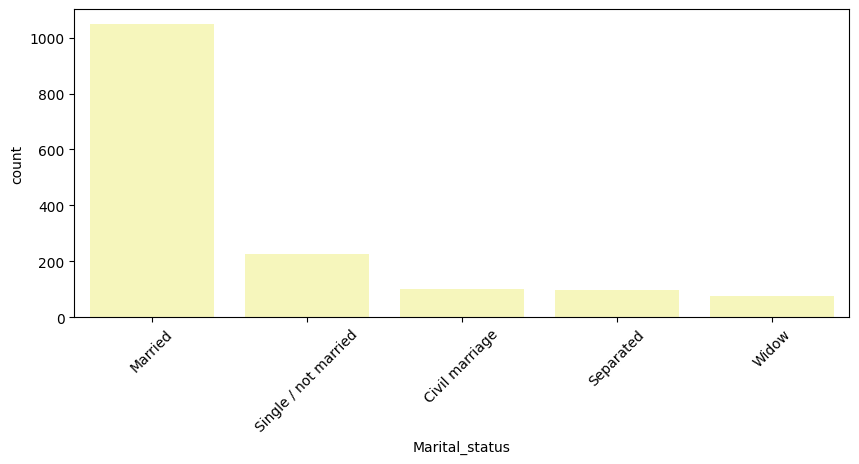

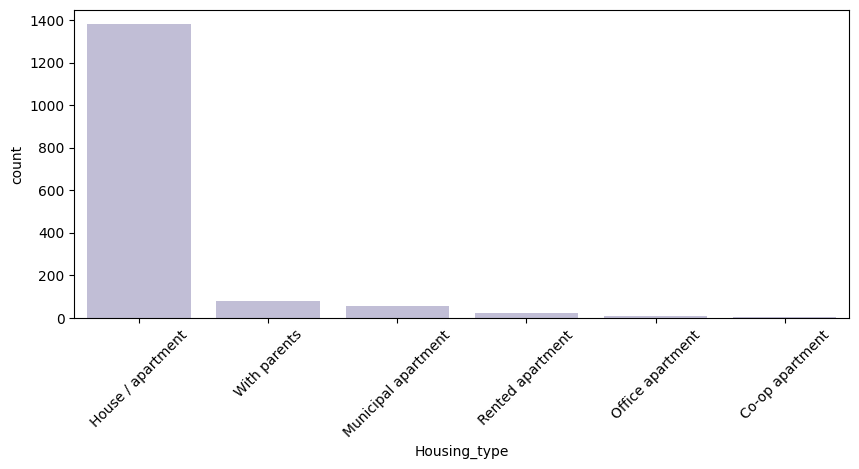

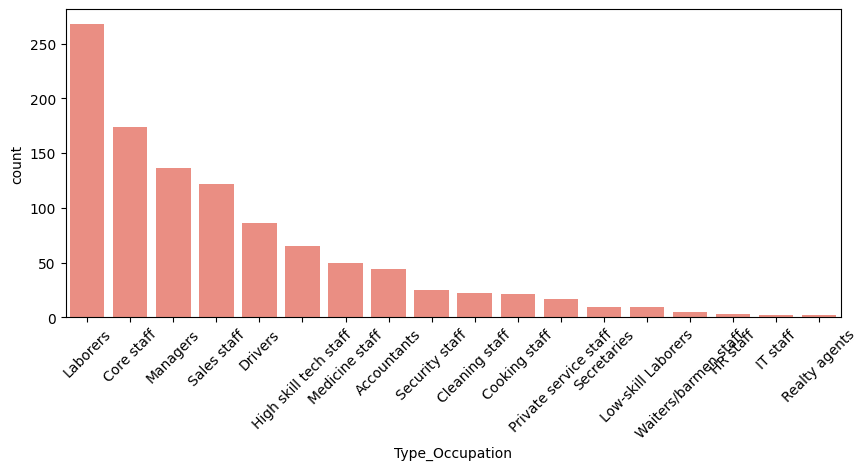

In [ ]:
from matplotlib import pyplot as plt
toview = ['EDUCATION', 'Marital_status','Housing_type','Type_Occupation']
palette = sns.color_palette("Set3")
for i,col in enumerate(toview):
  plt.figure(figsize=(10,4))
  sorted_counts=credit[col].value_counts().sort_values(ascending=False)
  sns.countplot(x=credit[col],order=sorted_counts.index,palette=palette[i:i+1])
  plt.xticks(rotation=45)

Based on the analysis of the provided data, a predominant portion of customers exhibit characteristics such as having a secondary special education background, being married, employed as laborers, and possessing residential ownership in the form of an apartment.

# Bivariate Analysis -

Visualization of the distribution of approval connection with other factors like "Marital status", "Children" and "Education".

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Married'),
  Text(1, 0, 'Single / not married'),
  Text(2, 0, 'Civil marriage'),
  Text(3, 0, 'Separated'),
  Text(4, 0, 'Widow')])

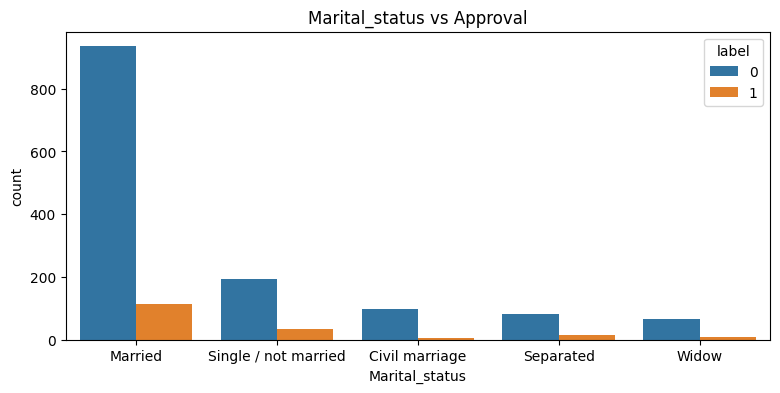

In [ ]:
#Checking Relationship b/w Marital status and approval.
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=credit["Marital_status"],hue=credit['label'],data=credit)
plt.title("Marital_status vs Approval")
plt.xticks(rotation=0)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '14')])

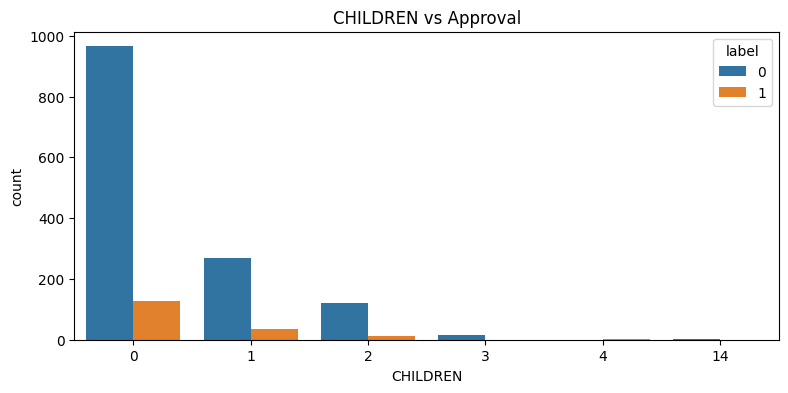

In [ ]:
#Checking Relationship b/w CHILDREN and Approval.
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=credit["CHILDREN"],hue=credit['label'],data=credit)
plt.title("CHILDREN vs Approval")
plt.xticks(rotation=0)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Higher education'),
  Text(1, 0, 'Secondary / secondary special'),
  Text(2, 0, 'Lower secondary'),
  Text(3, 0, 'Incomplete higher'),
  Text(4, 0, 'Academic degree')])

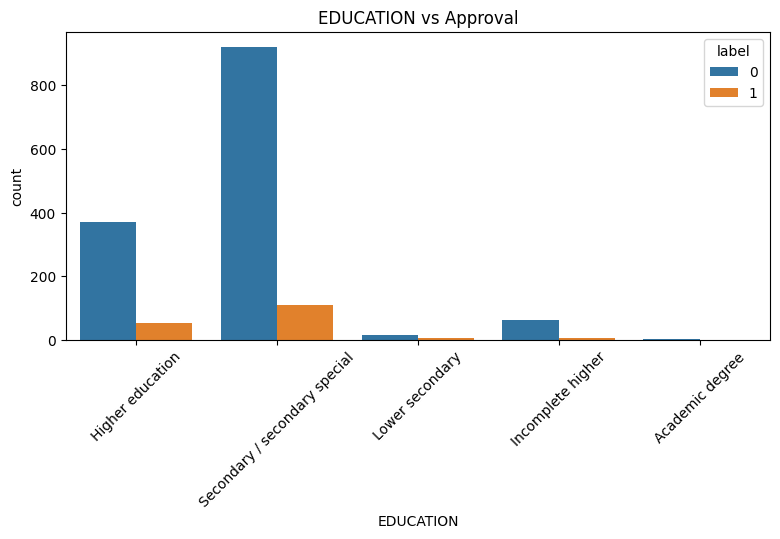

In [ ]:
#Checking Relationship b/w CHILDREN and Approval.
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=credit["EDUCATION"],hue=credit['label'],data=credit)
plt.title("EDUCATION vs Approval")
plt.xticks(rotation=45)

From Above plots you i can say that there is very few application which is apprved for differt different categories. also the data set is immblanced or biased towrds the rejection status.

Barplot - % of approval of each job role

In [ ]:
# Create a bar chart using Plotly Express to get the %of approval for each Job Type
import plotly.express as px
# Replace null values with a placeholder (e.g., 'Unknown')
credit['Type_Occupation'].fillna('Unknown', inplace=True)

# Calculate approval rates as a percentage for each job type
approval_rates = credit.groupby('Type_Occupation')['label'].mean() * 100

# Create a bar chart using Plotly Express
fig = px.bar(credit, x='Type_Occupation', y='label', color='Type_Occupation',
             text=approval_rates.loc[credit['Type_Occupation']].round(2).astype(str) + '%',
             labels={'Type_Occupation': 'Job Type'})  # Format as percentage

# Update the appearance
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.update_layout(title_x=0.5, title_text='<b>Credit Card Approval Rates by Job Type')

# Convert 'Unknown' back to NaN
credit['Type_Occupation'].replace('Unknown', np.nan, inplace=True)

# Show the plot
fig.show()


The visual representation indicates that individuals identified as IT staff exhibit a 100% approval rate for credit cards.

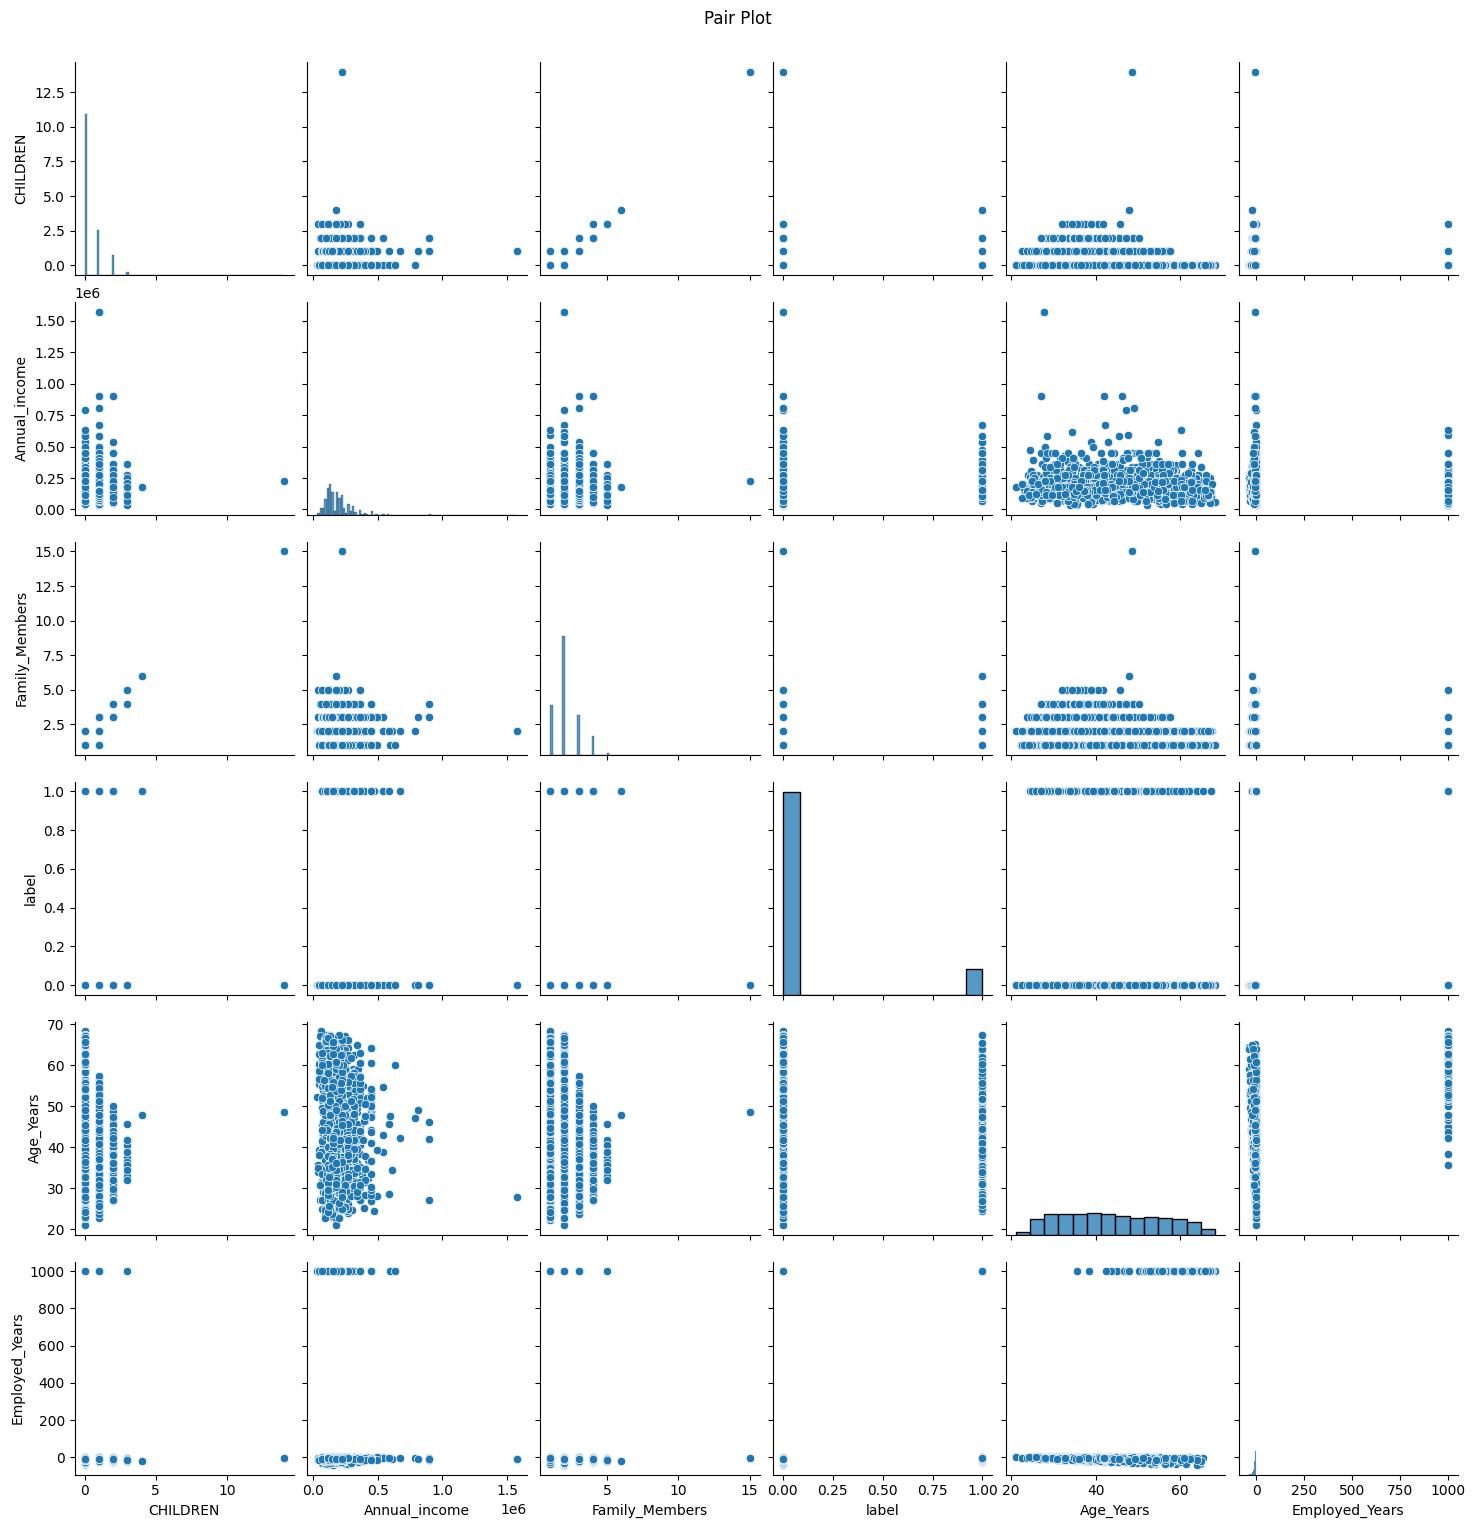

In [ ]:
# Visual exploration with a pair plot
sns.pairplot(credit)
plt.suptitle('Pair Plot', y=1.02)
plt.show()



<ipython-input-160-7fa85726ff3d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



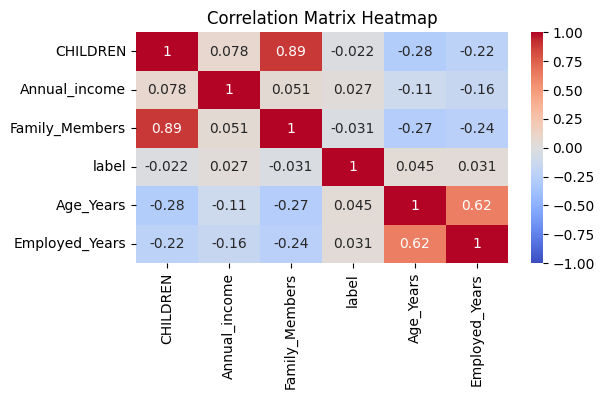

In [ ]:
# Correlation matrix heatmap
correlation_matrix = credit.corr()
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
credit = pd.DataFrame(credit) # checking correlation
print(credit.corr(method = 'spearman'))

                CHILDREN  Annual_income  Family_Members     label  Age_Years  \
CHILDREN        1.000000       0.066737        0.814579 -0.016235  -0.337533   
Annual_income   0.066737       1.000000        0.041730  0.006057  -0.112769   
Family_Members  0.814579       0.041730        1.000000 -0.026446  -0.277283   
label          -0.016235       0.006057       -0.026446  1.000000   0.044781   
Age_Years      -0.337533      -0.112769       -0.277283  0.044781   1.000000   
Employed_Years -0.167601      -0.170605       -0.190852  0.104709   0.216218   

                Employed_Years  
CHILDREN             -0.167601  
Annual_income        -0.170605  
Family_Members       -0.190852  
label                 0.104709  
Age_Years             0.216218  
Employed_Years        1.000000  


<ipython-input-161-f7c5cd9b2d9a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# **Observation**
By interpreting the heatmap, it's evident that the data is presented in a matrix with color gradients indicating varying values in each cell. The visualization enables easy identification of patterns, correlations, and trends, facilitating the observation that certain independent features lack strong relationships with dependent variables, while others exhibit noticeable inter-correlations. Heatmaps prove valuable for insights in data analysis, clustering, and examining correlations within the dataset.

# **Dealing With Null values**

In [ ]:
credit.isnull().sum() # checking total number of missing values in each column

GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Type_Occupation    488
Family_Members       0
label                0
Age_Years           22
Employed_Years       0
dtype: int64

Apart from Type_Occupation column, rest other columns have very less missing values.
- Either we can remove them or replace with something like mean or median too.


<Figure size 100x100 with 0 Axes>

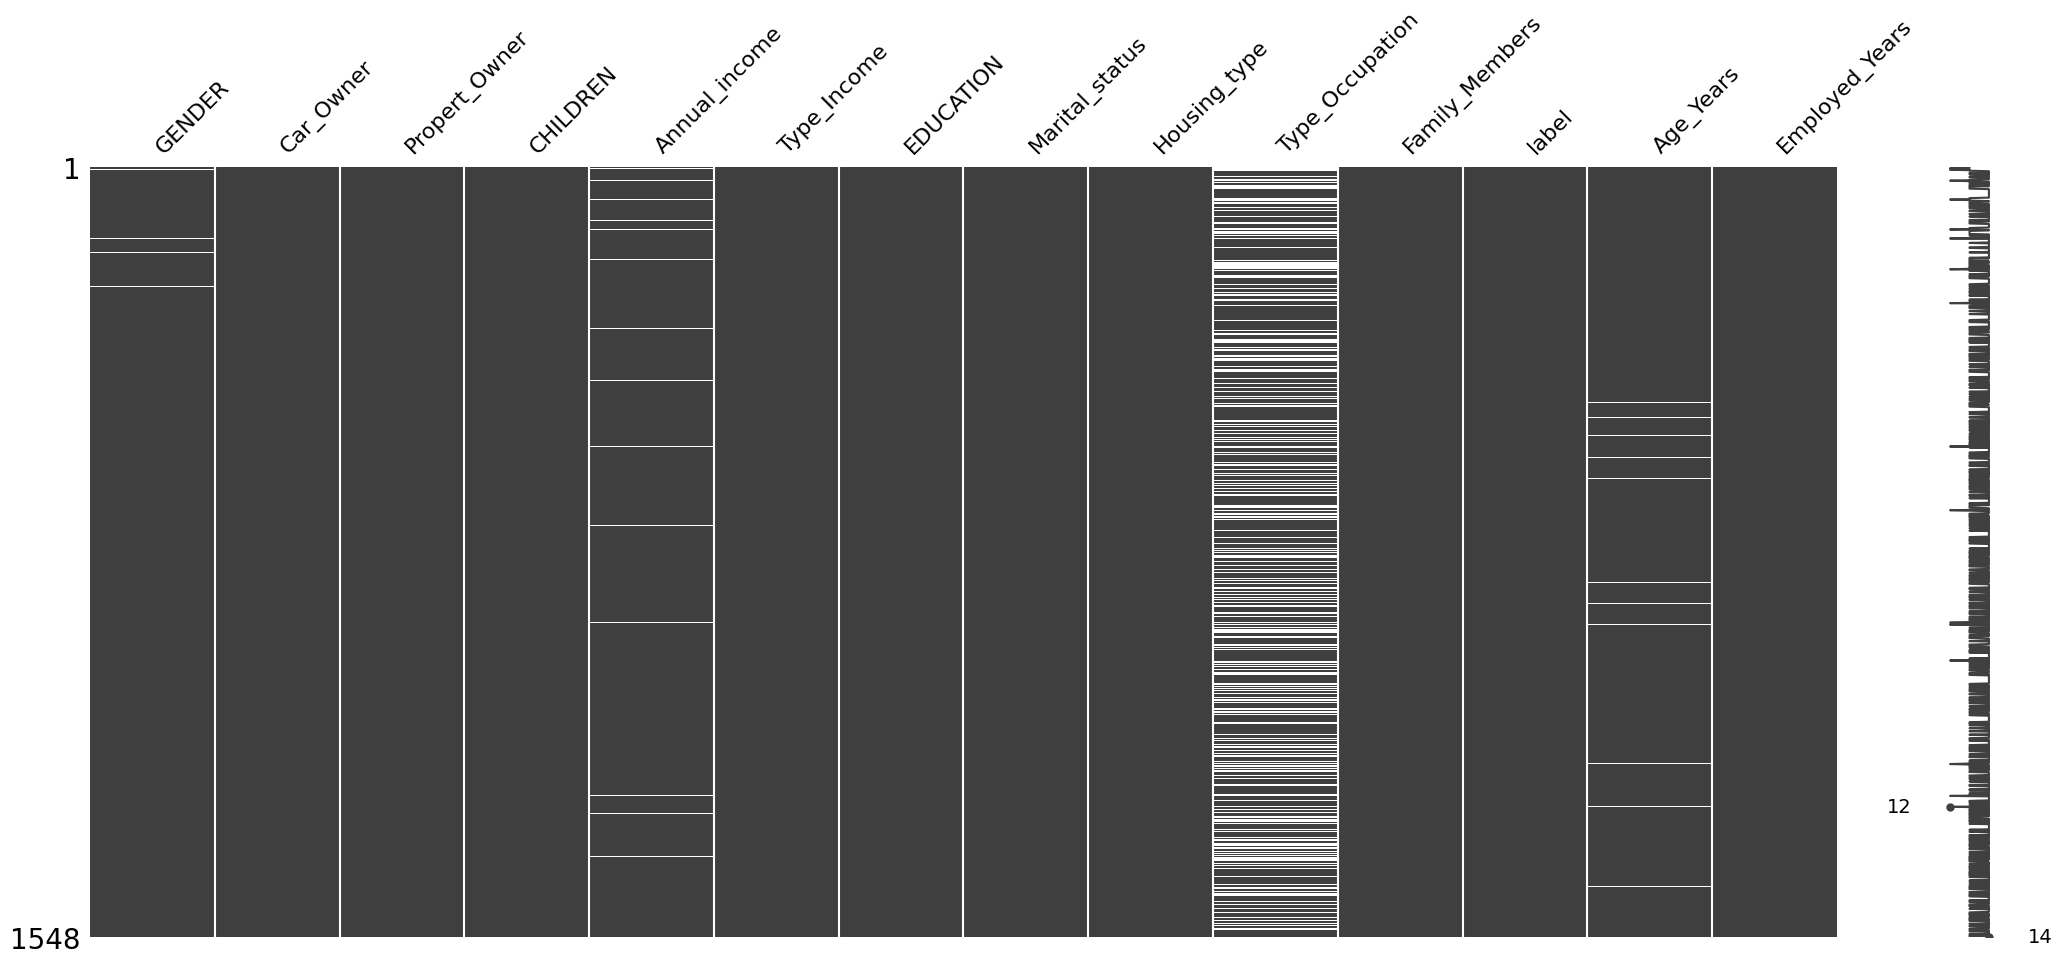

In [ ]:
# visualization of missing values
import missingno as msno
plt.figure(figsize=(1, 1))
msno.matrix(credit)
plt.show()

### Dealing with categorical missing values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
credit['GENDER'] = imputer.fit_transform(credit[['GENDER']])
credit['Type_Occupation'] = imputer.fit_transform(credit[['Type_Occupation']])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Cooking staff'),
  Text(3, 0, 'Sales staff'),
  Text(4, 0, 'Accountants'),
  Text(5, 0, 'High skill tech staff'),
  Text(6, 0, 'Managers'),
  Text(7, 0, 'Cleaning staff'),
  Text(8, 0, 'Drivers'),
  Text(9, 0, 'Low-skill Laborers'),
  Text(10, 0, 'IT staff'),
  Text(11, 0, 'Waiters/barmen staff'),
  Text(12, 0, 'Security staff'),
  Text(13, 0, 'Medicine staff'),
  Text(14, 0, 'Private service staff'),
  Text(15, 0, 'HR staff'),
  Text(16, 0, 'Secretaries'),
  Text(17, 0, 'Realty agents')])

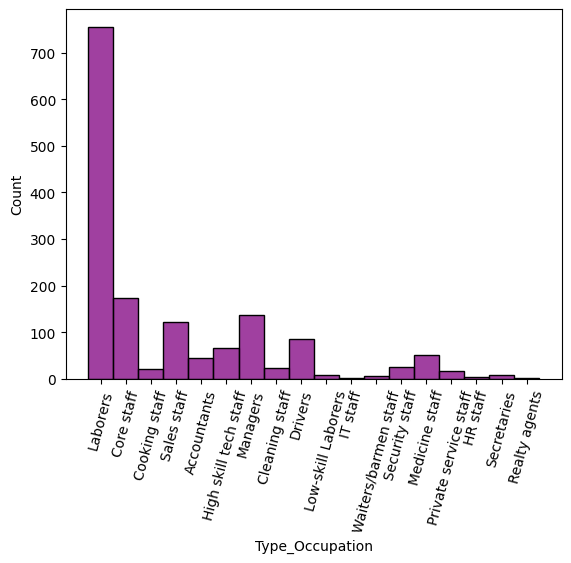

In [ ]:
sns.histplot(credit['Type_Occupation'],bins=20, color="purple")
plt.xticks(rotation=75)

In [ ]:
# Impute Numeric missing values
imputer = SimpleImputer(strategy='median')
credit['Annual_income'] = imputer.fit_transform(credit[['Annual_income']])
credit['Age_Years'] = imputer.fit_transform(credit[['Age_Years']])


In [ ]:
credit.isnull().sum()

GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Type_Occupation    0
Family_Members     0
label              0
Age_Years          0
Employed_Years     0
dtype: int64

# **Feature Engineering**

In [ ]:
# Ordinal encoding for Education
# we can also use regular expression too
from sklearn.preprocessing import OrdinalEncoder
Or_enc = OrdinalEncoder()
credit[["EDUCATION"]] = Or_enc.fit_transform(credit[["EDUCATION"]])

In [ ]:
#get_dummies for rest of categorical data
import pandas as pd

# Assuming 'credit' is your DataFrame
columns_to_encode = ["GENDER", "Car_Owner", "Propert_Owner", "Type_Income", "Marital_status", "Housing_type", "Type_Occupation"]

# Use one-hot encoding
credit = pd.get_dummies(credit, columns=columns_to_encode, drop_first=True)


In [ ]:
credit.columns = credit.columns.str.replace('/', '_').str.replace(' ', '_').str.replace('___', '_')

In [ ]:
credit.head()

,CHILDREN,Annual_income,EDUCATION,Family_Members,label,Age_Years,Employed_Years,GENDER_M,Car_Owner_Y,Propert_Owner_Y,...,Type_Occupation_Laborers,Type_Occupation_Low-skill_Laborers,Type_Occupation_Managers,Type_Occupation_Medicine_staff,Type_Occupation_Private_service_staff,Type_Occupation_Realty_agents,Type_Occupation_Sales_staff,Type_Occupation_Secretaries,Type_Occupation_Security_staff,Type_Occupation_Waiters_barmen_staff
0,0,180000.0,1.0,2,1,51.4,1000.0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,0,315000.0,1.0,2,1,37.1,-1.6,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,315000.0,1.0,2,1,42.9,-1.6,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,166500.0,1.0,2,1,37.1,-1.6,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,315000.0,1.0,2,1,37.1,-1.6,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
credit.describe(include = 'all') # Gives you a details of categorcal and numerical column

,CHILDREN,Annual_income,EDUCATION,Family_Members,label,Age_Years,Employed_Years,GENDER_M,Car_Owner_Y,Propert_Owner_Y,...,Type_Occupation_Laborers,Type_Occupation_Low-skill_Laborers,Type_Occupation_Managers,Type_Occupation_Medicine_staff,Type_Occupation_Private_service_staff,Type_Occupation_Realty_agents,Type_Occupation_Sales_staff,Type_Occupation_Secretaries,Type_Occupation_Security_staff,Type_Occupation_Waiters_barmen_staff
count,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,...,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.910294e+05,3.067829,2.161499,0.113049,43.902326,162.535142,0.366925,0.403101,0.652455,...,0.488372,0.005814,0.087855,0.032300,0.010982,0.001292,0.078811,0.005814,0.016150,0.003230
std,0.776691,1.124483e+05,1.348675,0.947772,0.316755,11.496301,377.304981,0.482122,0.490679,0.476345,...,0.500026,0.076052,0.283176,0.176852,0.104251,0.035933,0.269531,0.076052,0.126093,0.056759
min,0.000000,3.375000e+04,0.000000,1.000000,0.000000,21.100000,-40.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.215000e+05,1.000000,2.000000,0.000000,34.200000,-8.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.665000e+05,4.000000,2.000000,0.000000,42.900000,-4.300000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.250000e+05,4.000000,3.000000,0.000000,53.300000,-1.200000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,1.575000e+06,4.000000,15.000000,1.000000,68.300000,1000.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Dealing with outliers**

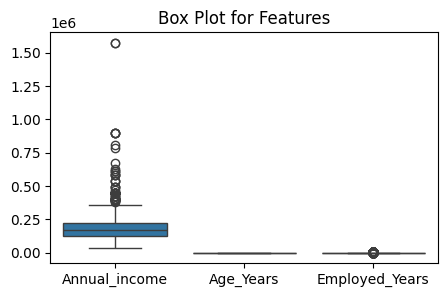

In [ ]:
# Create a box plot for three features
plt.figure(figsize=(5, 3))
sns.boxplot(data=credit[['Annual_income', 'Age_Years', 'Employed_Years']])
plt.title('Box Plot for Features')
plt.show()

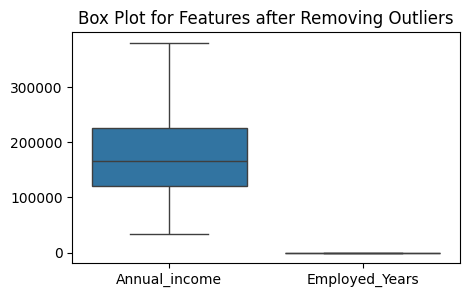

In [ ]:
# Apply IQR method to remove outliers for three features
for feature in ['Annual_income', 'Employed_Years']:
    Q1 = credit[feature].quantile(0.25)
    Q3 = credit[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Replace outliers with the upper and lower bounds
    credit[feature] = np.where(credit[feature] > upper_bound, upper_bound, credit[feature])
    credit[feature] = np.where(credit[feature] < lower_bound, lower_bound, credit[feature])

# Plot boxplots after removing outliers
plt.figure(figsize=(5, 3))
sns.boxplot(data=credit[['Annual_income', 'Employed_Years']])
plt.title('Box Plot for Features after Removing Outliers')
plt.show()

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CHILDREN                               1548 non-null   int64  
 1   Annual_income                          1548 non-null   float64
 2   EDUCATION                              1548 non-null   float64
 3   Family_Members                         1548 non-null   int64  
 4   label                                  1548 non-null   int64  
 5   Age_Years                              1548 non-null   float64
 6   Employed_Years                         1548 non-null   float64
 7   GENDER_M                               1548 non-null   uint8  
 8   Car_Owner_Y                            1548 non-null   uint8  
 9   Propert_Owner_Y                        1548 non-null   uint8  
 10  Type_Income_Pensioner                  1548 non-null   uint8  
 11  Type

In [ ]:
# List of uint8 columns to convert to float
uint8_columns = ['GENDER_M', 'Car_Owner_Y', 'Propert_Owner_Y', 'Type_Income_Pensioner',
                 'Type_Income_State_servant', 'Type_Income_Working', 'Marital_status_Married',
                 'Marital_status_Separated', 'Marital_status_Single_not_married', 'Marital_status_Widow',
                 'Housing_type_House_apartment', 'Housing_type_Municipal_apartment', 'Housing_type_Office_apartment',
                 'Housing_type_Rented_apartment', 'Housing_type_With_parents', 'Type_Occupation_Cleaning_staff',
                 'Type_Occupation_Cooking_staff', 'Type_Occupation_Core_staff', 'Type_Occupation_Drivers',
                 'Type_Occupation_HR_staff', 'Type_Occupation_High_skill_tech_staff', 'Type_Occupation_IT_staff',
                 'Type_Occupation_Laborers', 'Type_Occupation_Low-skill_Laborers', 'Type_Occupation_Managers',
                 'Type_Occupation_Medicine_staff', 'Type_Occupation_Private_service_staff', 'Type_Occupation_Realty_agents',
                 'Type_Occupation_Sales_staff', 'Type_Occupation_Secretaries', 'Type_Occupation_Security_staff',
                 'Type_Occupation_Waiters_barmen_staff']

# Convert uint8 columns to float
credit[uint8_columns] = credit[uint8_columns].astype(float)

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CHILDREN                               1548 non-null   int64  
 1   Annual_income                          1548 non-null   float64
 2   EDUCATION                              1548 non-null   float64
 3   Family_Members                         1548 non-null   int64  
 4   label                                  1548 non-null   int64  
 5   Age_Years                              1548 non-null   float64
 6   Employed_Years                         1548 non-null   float64
 7   GENDER_M                               1548 non-null   float64
 8   Car_Owner_Y                            1548 non-null   float64
 9   Propert_Owner_Y                        1548 non-null   float64
 10  Type_Income_Pensioner                  1548 non-null   float64
 11  Type

In [ ]:
#split data
from sklearn.model_selection import train_test_split
X=credit.drop(["label"], axis=1)
Y = credit['label']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1238, 38)
(1238,)
(310, 38)
(310,)


In [ ]:
X.shape

(1548, 38)

# **Feature Selection-**
 With Correlation

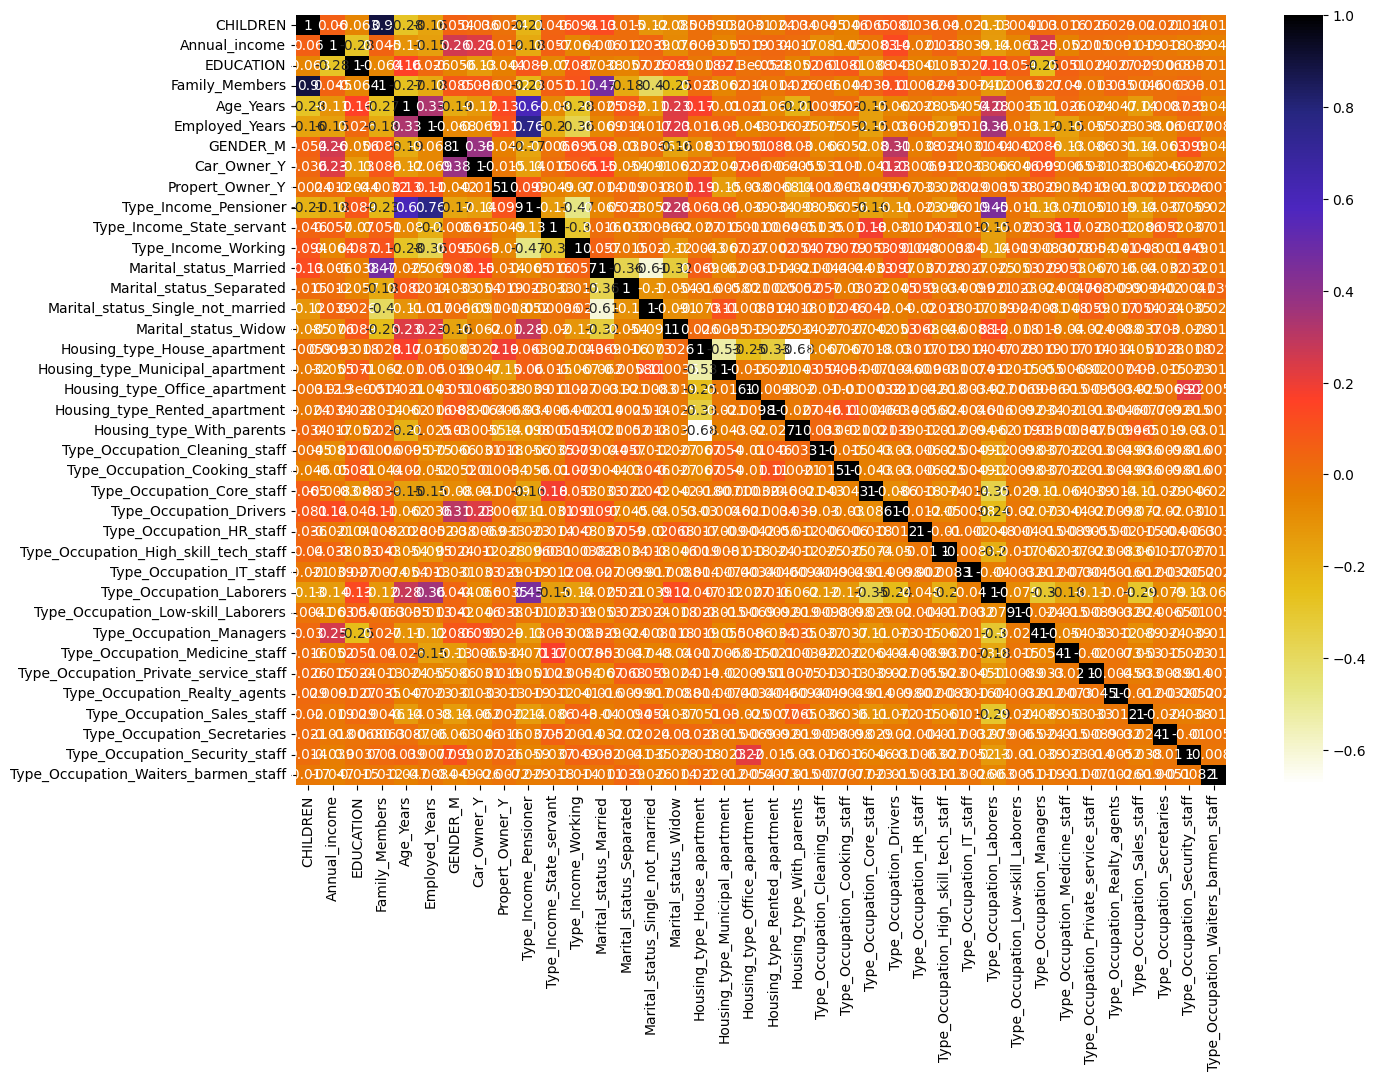

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

This Heatmap shoewd the children and Family member showing high correlation.

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))

1

In [ ]:
corr_features

{'Family_Members'}

# **Examine multicollinearity using VIF**
* Multicollinearity occurs when predictor variables in a regression model are highly correlated, leading to inflated standard errors and unreliable coefficient estimates. The Variance Inflation Factor (VIF) quantifies the extent of this correlation, with higher VIF values indicating stronger multicollinearity and potential challenges in interpreting individual predictors' effects. Typically, VIF values above 10 are considered indicative of problematic multicollinearity.

In [ ]:
# Examine multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]

print(vif_data)

                                  feature         VIF
0                                CHILDREN   49.601576
1                           Annual_income    7.793506
2                               EDUCATION    7.946729
3                          Family_Members  330.305557
4                               Age_Years   31.406520
5                          Employed_Years    3.585084
6                                GENDER_M    2.477841
7                             Car_Owner_Y    2.150546
8                         Propert_Owner_Y    3.145930
9                   Type_Income_Pensioner    5.387413
10              Type_Income_State_servant    1.471862
11                    Type_Income_Working    3.413496
12                 Marital_status_Married   11.369249
13               Marital_status_Separated    4.637504
14      Marital_status_Single_not_married    9.726506
15                   Marital_status_Widow    4.144935
16           Housing_type_House_apartment  215.452253
17       Housing_type_Munici

The default VIF cutoff value is 10; only variables with a VIF less than 10 will be included in the model. However, note that many sources say that a VIF of less than 5 is acceptable.

# **Recursive Feature Elimination**
Recursive Feature Elimination (RFE) is a feature selection technique that recursively removes less important features from the dataset based on model performance, iteratively enhancing model accuracy. It utilizes the ranking of feature importance provided by the chosen machine learning algorithm to eliminate features and improve the model's predictive power. RFE helps streamline models by retaining the most relevant features for optimal performance.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Apply RFE on Training Set with RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=30)  # Specify the number of features to select
x_train_rfe = rfe.fit_transform(x_train, y_train)

# Print the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)
print(rfe.ranking_)

#valuate on Testing Set
x_test_rfe = rfe.transform(x_test)
model.fit(x_train_rfe, y_train)
y_pred = model.predict(x_test_rfe)

# Evaluate the model performance on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Testing Set: {accuracy:.2f}")

Selected Features:
Index(['CHILDREN', 'Annual_income', 'EDUCATION', 'Family_Members', 'Age_Years',
       'Employed_Years', 'GENDER_M', 'Car_Owner_Y', 'Propert_Owner_Y',
       'Type_Income_Pensioner', 'Type_Income_State_servant',
       'Type_Income_Working', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single_not_married',
       'Marital_status_Widow', 'Housing_type_House_apartment',
       'Housing_type_Municipal_apartment', 'Housing_type_Rented_apartment',
       'Housing_type_With_parents', 'Type_Occupation_Cooking_staff',
       'Type_Occupation_Core_staff', 'Type_Occupation_Drivers',
       'Type_Occupation_High_skill_tech_staff', 'Type_Occupation_IT_staff',
       'Type_Occupation_Laborers', 'Type_Occupation_Low-skill_Laborers',
       'Type_Occupation_Managers', 'Type_Occupation_Sales_staff',
       'Type_Occupation_Security_staff'],
      dtype='object')
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 5 1 1 1 9 1 1 1 1 1 2 6 7 1 8 1
 4]
Model Accur

This represents the top most impactful features to be used for the model training and the rest of the features have ranking as per their significance.

So i am implement only these features in your final model and demonstrate the difference when used feature selection and when not used.

In [ ]:
# Extract the selected features from the original dataset
x_train = x_train[selected_features]
x_test  = x_test[selected_features]


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1238, 30)
(1238,)
(310, 30)
(310,)


# **Feature Scaling**

In [ ]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_train

array([[-0.52020668,  0.4975738 ,  0.66826308, ..., -0.30124558,
        -0.29643458, -0.12814196],
       [ 1.98569164,  2.37679057, -1.58803608, ...,  3.31955079,
        -0.29643458, -0.12814196],
       [ 1.98569164,  1.85932508,  0.66826308, ..., -0.30124558,
        -0.29643458, -0.12814196],
       ...,
       [-0.52020668, -0.42841707,  0.66826308, ..., -0.30124558,
        -0.29643458, -0.12814196],
       [-0.52020668, -0.04712671,  0.66826308, ..., -0.30124558,
        -0.29643458, -0.12814196],
       [ 1.98569164,  0.17075349, -0.83593636, ..., -0.30124558,
        -0.29643458, -0.12814196]])

In [ ]:
x_test=sc.transform(x_test)
x_test

array([[-0.52020668, -0.59182723, -1.58803608, ..., -0.30124558,
        -0.29643458, -0.12814196],
       [ 3.23864079,  2.13167533,  0.66826308, ...,  3.31955079,
        -0.29643458, -0.12814196],
       [-0.52020668, -0.21053687, -1.58803608, ..., -0.30124558,
        -0.29643458, -0.12814196],
       ...,
       [ 0.73274248, -0.59182723,  0.66826308, ..., -0.30124558,
        -0.29643458, -0.12814196],
       [-0.52020668, -1.40887799, -1.58803608, ..., -0.30124558,
        -0.29643458, -0.12814196],
       [-0.52020668,  0.4975738 ,  0.66826308, ..., -0.30124558,
        -0.29643458, -0.12814196]])

# **ML Modeling**

# **>Assumptions of Logistic Regression**
1. binary logistic regression requires the dependent variable to be binary and

2. ordinal logistic regression requires the dependent variable to be ordinal.

3. Observations should be independent of each other
little or no multi-collinearity among the independent variables

# **>Assumptions of Decision trees**
1. **Binary Splits:** Decision trees assume binary splits at each node, dividing the data into two subsets based on a chosen feature and threshold.

2. **Greedy Approach:** Decision tree construction follows a greedy approach, making locally optimal decisions at each node without considering the global optimal tree structure.

3. **Recursive Partitioning:** The algorithm recursively partitions the dataset, aiming to create homogeneous subsets in terms of the target variable by selecting the most informative features at each step.

# **>Assumptions of Random Forest**
1. **Independence:** Random Forest assumes that the individual decision trees in the ensemble are built independently, allowing for parallelization and reducing overfitting.

2. **Diversity:** The algorithm assumes that each tree in the forest is diverse, meaning they are not identical, which helps in capturing different aspects of the underlying data patterns.

3. **Ensemble Averaging:** The final prediction is based on the aggregated output of multiple trees, assuming that combining predictions from diverse models results in a more robust and accurate overall prediction.

# **>Support Vector Machines (SVMs) assume that:**

1. Data is linearly separable in a higher-dimensional space, allowing for the effective classification of points with a hyperplane.
2. The goal is to maximize the margin between different classes, promoting better generalization to new, unseen data.
3. SVMs assume that the input features accurately represent the underlying patterns in the data, and they perform well in high-dimensional spaces.

# **>K-Nearest Neighbors assume that:**
1. **Local Smoothness Assumption:** K-Nearest Neighbors assumes that data points in close proximity share similar characteristics, as it relies on the local smoothness assumption, meaning neighboring points in the feature space are likely to have similar target values.

2. **Decision Boundary Locality:** The algorithm assumes that decision boundaries between different classes are locally defined, implying that the class of a data point can be determined by the majority class among its k-nearest neighbors.

3. **Equal Importance of Features:** K-Nearest Neighbors treats all features equally and assumes that each feature contributes equally to the distance computation, making it sensitive to irrelevant or noisy features unless feature scaling or weighting is applied.

**Importing different Libraries for models building.**

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
from sklearn.ensemble import BaggingClassifier
import math
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

# **SMOTE- for Imbalanced dataset**

In [ ]:
pip install imbalanced-learn

In [ ]:
y_train.value_counts()

0    1098
1     140
Name: label, dtype: int64

In [ ]:
# Apply SMOTE to the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts()

0    1098
1    1098
Name: label, dtype: int64

# **> Logistic Regression:-**

**Parameter grid for Logistic Regression**

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
# Create logistic regression model
model1 = LogisticRegression()
# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],           # Regularization parameter
    'penalty': ['l1', 'l2'],                       # Type of regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear'], # Optimization algorithm
    'max_iter': [100, 500, 1000],                  # Maximum number of iterations
    'class_weight': [None, 'balanced']             # Weight of classes
}

# Create GridSearchCV object
grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

\\\\\Result\\\\\

# Best Parameter for logistic regression model =
 {'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
best_score_ = 0.6573059993228061
'''

"\nfrom sklearn.model_selection import GridSearchCV\n# Create logistic regression model\nmodel1 = LogisticRegression()\n# Define hyperparameter grid\nparam_grid = {\n    'C': [0.001, 0.01, 0.1, 1, 10, 100],           # Regularization parameter\n    'penalty': ['l1', 'l2'],                       # Type of regularization\n    'solver': ['newton-cg', 'lbfgs', 'liblinear'], # Optimization algorithm\n    'max_iter': [100, 500, 1000],                  # Maximum number of iterations\n    'class_weight': [None, 'balanced']             # Weight of classes\n}\n\n# Create GridSearchCV object\ngrid_search = GridSearchCV(model1, param_grid, cv=5, scoring='accuracy')\n\n# Fit the model to the training data\ngrid_search.fit(x_train, y_train)\n\nprint(grid_search.best_params_)\nprint(grid_search.best_score_)\n\n\\\\\\Result\\\\\n# Best Parameter for logistic regression model =\n {'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}\nbest_score_ = 0.6573059993228061\

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(C = 100, class_weight = None, max_iter = 100, penalty = 'l2', solver = 'newton-cg')

In [ ]:
# Fit the model to your training data
model1.fit(x_train, y_train)

LogisticRegression(C=100, solver='newton-cg')

In [ ]:
y_train_pred = model1.predict(x_train)
y_test_pred = model1.predict(x_test)

In [ ]:
 # Performance of Training set
model1_train_accuracy = accuracy_score(y_train, y_train_pred)
model1_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model1_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model1_train_recall = recall_score(y_train, y_train_pred,average='weighted')

print('LogisticRegression Model performance for Training set')
print("- Accuracy: {:.2f}".format(model1_train_accuracy))
print('- F1 score: {:2f}'.format(model1_train_f1))
print('- Precision: {:2f}'.format(model1_train_precision))
print('- Recall: {:2f}'.format(model1_train_recall))

LogisticRegression Model performance for Training set
- Accuracy: 0.65
- F1 score: 0.653383
- Precision: 0.653600
- Recall: 0.653461


In [ ]:
 # Performance of Test set
model1_test_accuracy = accuracy_score(y_test, y_test_pred)
model1_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model1_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model1_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

print('LogisticRegression Model performance for Test set')
print('- Accuracy: {:.2f}'.format(model1_test_accuracy) )
print('- Fl score: {:.2f}'.format(model1_test_f1))
print('- Precision: {:.2f}'.format(model1_test_precision))
print('- Recall: {:.2f}'.format(model1_test_recall))


LogisticRegression Model performance for Test set
- Accuracy: 0.61
- Fl score: 0.68
- Precision: 0.81
- Recall: 0.61


# **Summery:**
* The model achieves a moderate level of accuracy on the training set, suggesting that it captures a significant portion of the patterns present in the data. The F1 score, which balances precision and recall, is consistent with the overall accuracy.

* On the test set, the model's performance shows a slight decrease in accuracy compared to the training set. Notably, the F1 score is relatively higher, indicating a better balance between precision and recall. The model achieves a precision of 0.81, implying a reasonable ability to correctly identify positive instances, while maintaining a recall of 0.61, denoting the model's capability to capture a significant portion of actual positive instances.

* **Conclusion:**
While the model exhibits moderate success in capturing patterns within the training data, there is room for improvement, especially when generalizing to unseen data (test set). Further model refinement, feature engineering, or consideration of alternative algorithms may be explored to enhance performance and address potential overfitting or underfitting concerns. Additionally, a deeper understanding of the dataset and problem domain could provide insights for model enhancement.









**>Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print("LR Confusion Matrix:")
print(cm)

LR Confusion Matrix:
[[173 102]
 [ 20  15]]


**Summary:**<br>
In summary, the confusion matrix provides insights into the model's performance, revealing strengths and areas for improvement. While the model demonstrates reasonable accuracy, precision, and specificity, there is room for enhancing recall and the overall F1 score. Further model refinement or exploration of other algorithms may be considered to improve predictive performance.

**Cross validation is the concept that tells how good your model is**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(C = 100, class_weight = None, max_iter = 100, penalty = 'l2', solver = 'newton-cg')

# Define the number of folds for K-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [ ]:
# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(model1, x_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Fit the model on the entire training set
model1.fit(x_train, y_train)

# Evaluate the model on the test set
test_accuracy = model1.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [0.62727273 0.64009112 0.68109339 0.67198178 0.61047836]
Mean Accuracy: 0.6461834748395112
Test Accuracy: 0.6064516129032258


Summary:

The Logistic Regression model underwent cross-validation, providing insights into its stability and generalization across different subsets of the training data.

**Cross-Validation Scores:**
- **Mean Accuracy:** 0.646
- **Individual Fold Scores:** [0.627, 0.640, 0.681, 0.672, 0.610]

The cross-validation results indicate a consistent performance of the Logistic Regression model across different folds, with an average accuracy of 0.646. Individual fold scores show slight variability, suggesting robustness but also highlighting potential challenges in capturing diverse patterns present in the data.

**Test Set Performance:**
- **Accuracy:** 0.606

On the test set, the model achieves an accuracy of 0.606, reflecting its ability to generalize to new, unseen data. The test accuracy is consistent with the mean accuracy from cross-validation.

**Conclusion:**
The Logistic Regression model demonstrates fair stability during cross-validation and reasonable generalization to the test set. However, further exploration and refinement may be needed to improve overall accuracy and address potential limitations. Consideration of feature engineering, hyperparameter tuning, or exploring alternative models could contribute to enhancing the model's performance. Understanding the context and characteristics of the data could guide the next steps in refining the logistic regression model for better predictive capabilities.

# **>Decision Tree**

**Parameter grid for Logistic Regression**

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
# Create DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
# Define hyperparameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],          # Criterion for splitting
    'splitter': ['best', 'random'],            # Strategy to choose the split at each node
    'max_depth': [None, 10, 20, 30],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],     # Number of features to consider for the best split
    'class_weight': [None, 'balanced']          # Weight of classes
}

# Create GridSearchCV object
grid_search_dt = GridSearchCV(estimator= model2, param_grid = param_grid_dt, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_dt.fit(x_train, y_train)
# Get the best parameters
best_params_dt = grid_search_dt.best_params_

# Print the best parameters
print("Best Hyperparameters for Decision Tree:")
print(best_params_dt)

\\\\\Result\\\\\

Best Hyperparameters for Decision Tree:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
'''

'\nfrom sklearn.model_selection import GridSearchCV\n# Create DecisionTreeClassifier model\nfrom sklearn.tree import DecisionTreeClassifier\nmodel2 = DecisionTreeClassifier()\n# Define hyperparameter grid\nparam_grid_dt = {\n    \'criterion\': [\'gini\', \'entropy\'],          # Criterion for splitting\n    \'splitter\': [\'best\', \'random\'],            # Strategy to choose the split at each node\n    \'max_depth\': [None, 10, 20, 30],            # Maximum depth of the tree\n    \'min_samples_split\': [2, 5, 10],            # Minimum samples required to split an internal node\n    \'min_samples_leaf\': [1, 2, 4],              # Minimum number of samples required to be at a leaf node\n    \'max_features\': [None, \'sqrt\', \'log2\'],     # Number of features to consider for the best split\n    \'class_weight\': [None, \'balanced\']          # Weight of classes\n}\n\n# Create GridSearchCV object\ngrid_search_dt = GridSearchCV(estimator= model2, param_grid = param_grid_dt, cv=5, scoring

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(class_weight= 'balanced', criterion = 'entropy', max_depth = 30, max_features = None, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')

In [ ]:
# Fit the model to your training data
model2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, splitter='random')

In [ ]:
# Make predictions
y_train_pred = model2.predict(x_train)
y_test_pred =  model2.predict(x_test)

In [ ]:
# Performance of Training set
model2_train_accuracy = accuracy_score(y_train, y_train_pred)
model2_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model2_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model2_train_recall = recall_score(y_train, y_train_pred,average='weighted')

print('Model performance for Training set')
print("- Accuracy: {:.2f}".format(model2_train_accuracy))
print('- F1 score: {:2f}'.format(model2_train_f1))
print('- Precision: {:2f}'.format(model2_train_precision))
print('- Recall: {:2f}'.format(model2_train_recall))

Model performance for Training set
- Accuracy: 0.99
- F1 score: 0.994080
- Precision: 0.994081
- Recall: 0.994080


In [ ]:
 # Performance of Test set
model2_test_accuracy = accuracy_score(y_test, y_test_pred)
model2_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model2_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model2_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Test set')
print('- Accuracy: {:.2f}'.format(model2_test_accuracy) )
print('- Fl score: {:.2f}'.format(model2_test_f1))
print('- Precision: {:.2f}'.format(model2_test_precision))
print('- Recall: {:.2f}'.format(model2_test_recall))

Model performance for Test set
- Accuracy: 0.87
- Fl score: 0.87
- Precision: 0.88
- Recall: 0.87


**Decision Tree Model Summary:**

* The Decision Tree model demonstrates high performance on the training set, achieving an impressive accuracy of 0.99. The F1 score, precision, and recall metrics also exhibit excellent values, all exceeding 0.99. This suggests that the model effectively captures the patterns in the training data.

* On the test set, the model maintains strong performance with an accuracy of 0.87. The F1 score, precision, and recall metrics on the test set are also commendable, hovering around 0.87. This indicates that the Decision Tree model generalizes well to new, unseen data, although there is a slight drop in performance compared to the training set, which is typical.

* In conclusion, the Decision Tree model proves to be a robust classifier, showcasing remarkable accuracy and reliability in both training and test scenarios. Further exploration and fine-tuning may be considered to address any potential overfitting or enhance model performance, depending on the specific project goals and requirements.

**> confusion_matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[252  23]
 [ 18  17]]


**Cross validation is the concept that tells how good your model is**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
model2 = DecisionTreeClassifier(class_weight= 'balanced', criterion = 'entropy', max_depth = 30, max_features = None, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')

# Define the number of folds for K-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [ ]:
# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(model2, x_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Fit the model on the entire training set
model2.fit(x_train, y_train)

# Evaluate the model on the test set
test_accuracy = model2.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [0.90454545 0.8952164  0.8929385  0.87471526 0.89977221]
Mean Accuracy: 0.8934375647131911
Test Accuracy: 0.8387096774193549


**Summary:**

**Decision Tree Model Cross-Validation and Test Summary:**

* The Decision Tree model undergoes cross-validation with consistent accuracy scores across different folds, ranging from 0.874 to 0.904. The mean accuracy across folds is 0.893, indicating stable performance on various subsets of the data.

* On the test set, the model achieves an accuracy of 0.839, demonstrating good generalization to new, unseen data. The test accuracy is slightly lower than the mean accuracy from cross-validation, but it remains at a commendable level.

* In summary, the Decision Tree model exhibits reliable and consistent performance across cross-validation folds, and it generalizes well to the test set. While the model may benefit from further exploration and potential fine-tuning, it already serves as a robust classifier for the given task. Considerations for model interpretability and specific project requirements will guide decisions on whether to optimize further or deploy the model as is.

# **>Support Vector Machine(SVM)**

**Parameter Grid for SVM**

In [ ]:
'''
#Model not performing well so did the hyper parameter testing to get best parameter.
from sklearn.model_selection import GridSearchCV
# Create SVC model
from sklearn.svm import SVC, SVR
model3 = SVC(C= 0.1, kernel= 'poly')
# Define hyperparameter grid
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'class_weight': [None, 'balanced'],
    'max_iter': [-1, 100, 500],
}

# Create GridSearchCV object
grid_search_svc = GridSearchCV(estimator= model3, param_grid = param_grid_svc, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_svc.fit(x_train, y_train)
# Get the best parameters
best_params_svc = grid_search_svc.best_params_

# Print the best parameters
print("Best Hyperparameters for SVC:")
print(best_params_svc)
'''

'\n#Model not performing well so did the hyper parameter testing to get best parameter.\nfrom sklearn.model_selection import GridSearchCV\n# Create SVC model\nfrom sklearn.svm import SVC, SVR\nmodel3 = SVC(C= 0.1, kernel= \'poly\')\n# Define hyperparameter grid\nparam_grid_svc = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'rbf\'],\n    \'gamma\': [\'scale\', \'auto\', 0.01, 0.1],\n    \'class_weight\': [None, \'balanced\'],\n    \'max_iter\': [-1, 100, 500],\n}\n\n# Create GridSearchCV object\ngrid_search_svc = GridSearchCV(estimator= model3, param_grid = param_grid_svc, cv=5, scoring=\'accuracy\')\n\n# Fit the model to the training data\ngrid_search_svc.fit(x_train, y_train)\n# Get the best parameters\nbest_params_svc = grid_search_svc.best_params_\n\n# Print the best parameters\nprint("Best Hyperparameters for SVC:")\nprint(best_params_svc)\n'

In [ ]:
from sklearn.svm import SVC, SVR
model3 = SVC(C = 10, class_weight = 'balanced', gamma = 0.1, kernel = 'rbf', max_iter = 500)

In [ ]:
# Fit the model to your training data
model3.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(C=10, class_weight='balanced', gamma=0.1, max_iter=500)

In [ ]:
# Make predictions
y_train_pred = model3.predict(x_train)
y_test_pred =  model3.predict(x_test)

In [ ]:
# Performance of Training set
model3_train_accuracy = accuracy_score(y_train, y_train_pred)
model3_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model3_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model3_train_recall = recall_score(y_train, y_train_pred,average='weighted')

print('Model performance for Training set')
print("- Accuracy: {:.2f}".format(model3_train_accuracy))
print('- F1 score: {:2f}'.format(model3_train_f1))
print('- Precision: {:2f}'.format(model3_train_precision))
print('- Recall: {:2f}'.format(model3_train_recall))

Model performance for Training set
- Accuracy: 0.97
- F1 score: 0.971756
- Precision: 0.972526
- Recall: 0.971767


In [ ]:
 # Performance of Test set
model3_test_accuracy = accuracy_score(y_test, y_test_pred)
model3_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model3_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model3_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Test set')
print('- Accuracy: {:.2f}'.format(model3_test_accuracy) )
print('- Fl score: {:.2f}'.format(model3_test_f1))
print('- Precision: {:.2f}'.format(model3_test_precision))
print('- Recall: {:.2f}'.format(model3_test_recall))

Model performance for Test set
- Accuracy: 0.86
- Fl score: 0.87
- Precision: 0.87
- Recall: 0.86


**Summary**

* The Support Vector Classifier (SVC) demonstrates strong performance on both the training and test sets. On the training set, the model achieves an impressive accuracy of 0.97, indicating its ability to correctly classify instances. The F1 score, a measure of precision and recall, is also high at 0.971756, suggesting a balanced performance between precision and recall. The model's precision, the ability to avoid false positives, is 0.972526, and the recall, the ability to capture true positives, is 0.971767.

* The performance of the SVC on the test set remains robust, with an accuracy of 0.86. The F1 score is maintained at a high level of 0.87, demonstrating a continued balance between precision and recall. The precision and recall scores on the test set are also solid at 0.87 and 0.86, respectively.

* In summary, the SVC model exhibits strong generalization capabilities, as evidenced by its consistent performance on both the training and test sets. The balance between precision and recall suggests the model's ability to effectively classify instances while minimizing false positives and false negatives. Further analysis and potential fine-tuning could be explored to optimize the model for specific project requirements.

**> confusion_matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[250  25]
 [ 18  17]]


**Cross validation is the concept that tells how good your model is**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC, SVR
model3 = SVC(C = 10, class_weight = 'balanced', gamma = 0.1, kernel = 'rbf', max_iter = 500)

# Define the number of folds for K-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [ ]:
# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(model3, x_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Fit the model on the entire training set
model3.fit(x_train, y_train)

# Evaluate the model on the test set
test_accuracy = model3.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Cross-Validation Scores: [0.92954545 0.93849658 0.93849658 0.91799544 0.93394077]
Mean Accuracy: 0.9316949679022573
Test Accuracy: 0.8612903225806452


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



**Summary:**

* The Support Vector Classifier (SVC) demonstrates consistent and strong performance across different folds in cross-validation. The accuracy scores range from 0.918 to 0.939, with a mean accuracy of 0.932. This indicates the model's ability to generalize well to diverse subsets of the data.

* On the test set, the SVC maintains a good level of performance with an accuracy of 0.861. Although there is a slight drop in accuracy compared to the cross-validation mean, the model still exhibits robust generalization capabilities on new, unseen data.

* In summary, the SVC model's performance is reliable, as shown by consistent cross-validation results and a strong accuracy score on the test set. The balance between training and testing accuracy suggests that the model is well-generalized and capable of making accurate predictions on new instances. Further analysis and potential fine-tuning may be explored to optimize the model for specific project requirements.

# **>XGBClassifier**


In [ ]:
from xgboost import XGBClassifier
model4 = XGBClassifier(C = 0.1, class_weight = None, gamma = 0.1, kernel = 'linear', max_iter = -1)

**Parameter grid for xgbclassifire**

In [ ]:
'''
#Model not performing well so did the hyper parameter testing to get best parameter.
from sklearn.model_selection import GridSearchCV
# Create XGb model
from xgboost import XGBClassifier
model4 = XGBClassifier()
# Define hyperparameter grid
param_grid_xgb = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'class_weight': [None, 'balanced'],
    'max_iter': [-1, 100, 500],
}

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(estimator= model4, param_grid = param_grid_xgb, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_xgb.fit(x_train, y_train)
# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_

# Print the best parameters
print("Best Hyperparameters for XGb:")
print(best_params_xgb)

\\\\\\\Result\\\\\

Best Hyperparameters for XGb:
{'C': 0.1, 'class_weight': None, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1}
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:
'''

'\n#Model not performing well so did the hyper parameter testing to get best parameter.\nfrom sklearn.model_selection import GridSearchCV\n# Create XGb model\nfrom xgboost import XGBClassifier\nmodel4 = XGBClassifier()\n# Define hyperparameter grid\nparam_grid_xgb = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'rbf\'],\n    \'gamma\': [\'scale\', \'auto\', 0.01, 0.1],\n    \'class_weight\': [None, \'balanced\'],\n    \'max_iter\': [-1, 100, 500],\n}\n\n# Create GridSearchCV object\ngrid_search_xgb = GridSearchCV(estimator= model4, param_grid = param_grid_xgb, cv=5, scoring=\'accuracy\')\n\n# Fit the model to the training data\ngrid_search_xgb.fit(x_train, y_train)\n# Get the best parameters\nbest_params_xgb = grid_search_xgb.best_params_\n\n# Print the best parameters\nprint("Best Hyperparameters for XGb:")\nprint(best_params_xgb)\n\n\\\\\\\\Result\\\\\nBest Hyperparameters for XGb:\n{\'C\': 0.1, \'class_weight\': None, \'gamma\': 0.1, \'kernel\': \'linear\', \'max_iter\'

In [ ]:
# Fit the model to your training data
model4.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:09:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C", "kernel", "max_iter" } are not used.




XGBClassifier(C=0.1, base_score=None, booster=None, callbacks=None,
              class_weight=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, kernel='linear', learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_iter=-1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, ...)

In [ ]:
# Make predictions
y_train_pred = model4.predict(x_train)
y_test_pred =  model4.predict(x_test)

In [ ]:
# Performance of Training set
model4_train_accuracy = accuracy_score(y_train, y_train_pred)
model4_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model4_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model4_train_recall = recall_score(y_train, y_train_pred,average='weighted')

print('Model performance for Training set')
print("- Accuracy: {:.2f}".format(model4_train_accuracy))
print('- F1 score: {:2f}'.format(model4_train_f1))
print('- Precision: {:2f}'.format(model4_train_precision))
print('- Recall: {:2f}'.format(model4_train_recall))

Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.995446
- Precision: 0.995446
- Recall: 0.995446


In [ ]:
 # Performance of Test set
model4_test_accuracy = accuracy_score(y_test, y_test_pred)
model4_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model4_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model4_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Test set')
print('- Accuracy: {:.2f}'.format(model4_test_accuracy) )
print('- Fl score: {:.2f}'.format(model4_test_f1))
print('- Precision: {:.2f}'.format(model4_test_precision))
print('- Recall: {:.2f}'.format(model4_test_recall))

Model performance for Test set
- Accuracy: 0.89
- Fl score: 0.89
- Precision: 0.88
- Recall: 0.89


**Summary**

* The XGBoost classifier demonstrates excellent performance on the training set, achieving perfect accuracy (1.00) and high values for precision (0.995446), recall (0.995446), and F1 score (0.995446). This suggests that the model has effectively learned the patterns in the training data.

* On the test set, the model maintains a good level of performance with an accuracy of 0.89. The F1 score, precision, and recall on the test set are also reasonably high, indicating that the model generalizes well to new, unseen data. However, there is a slight drop in performance compared to the training set, which is expected. The model is still performing well, but it might be worth exploring ways to fine-tune the model or address potential overfitting for further improvement.

* In summary, the XGBoost model exhibits strong performance on both the training and test sets, demonstrating its effectiveness in learning from the data and making accurate predictions.

**> confusion_matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[262  13]
 [ 20  15]]


**Cross validation is the concept that tells how good your model is**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier
model4 = XGBClassifier(C = 0.1, class_weight = None, gamma = 0.1, kernel = 'linear', max_iter = -1)

# Define the number of folds for K-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [ ]:
# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(model4, x_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Fit the model on the entire training set
model4.fit(x_train, y_train)

# Evaluate the model on the test set
test_accuracy = model4.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:09:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C", "kernel", "max_iter" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:09:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C", "kernel", "max_iter" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:09:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C", "kernel", "max_iter" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:09:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C", "kernel", "max_iter" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:09:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C", "kernel", "max_iter" } are not used.




Cross-Validation Scores: [0.94545455 0.95671982 0.92027335 0.95216401 0.9476082 ]
Mean Accuracy: 0.944443984261752


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[05:09:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "C", "kernel", "max_iter" } are not used.




Test Accuracy: 0.8935483870967742


**Summary**

* The XGBoost classifier displays robust performance across different folds in cross-validation, with accuracy scores ranging from 0.920 to 0.957. The mean accuracy across all folds is 0.944, indicating consistent and strong performance on various subsets of the data.

* On the test set, the model maintains a good level of performance with an accuracy of 0.894. The test accuracy is slightly lower than the mean accuracy from cross-validation, but it still indicates that the model generalizes well to new, unseen data.

* In summary, the XGBoost model demonstrates stable and strong performance across different subsets of the data during cross-validation, and it generalizes well to the test set with a high accuracy level.

# **>Ensemble model**

**Parameter grid for Ensemble model**

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
# Create XGb model
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(n_estimators=150)
# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100],           # Number of trees in the forest
    'max_depth': [None, 10, 20],         # Maximum depth of the trees
    'min_samples_split': [2, 5],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],    # Number of features to consider for the best split
    'bootstrap': [True, False],          # Whether bootstrap samples are used when building trees
    'class_weight': [None, 'balanced']   # Weight of classes
}


# Create GridSearchCV object
grid_search_rf = GridSearchCV(estimator= model5, param_grid = param_grid_rf, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_rf.fit(x_train, y_train)
# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Print the best parameters
print("Best Hyperparameters for random forest:")
print(best_params_rf)

\\\\Result\\\\

Best Hyperparameters for random forest:
{'bootstrap': False, 'class_weight': None, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
'''


'\nfrom sklearn.model_selection import GridSearchCV\n# Create XGb model\nfrom sklearn.ensemble import RandomForestClassifier\nmodel5 = RandomForestClassifier(n_estimators=150)\n# Define hyperparameter grid\nparam_grid_rf = {\n    \'n_estimators\': [50, 100],           # Number of trees in the forest\n    \'max_depth\': [None, 10, 20],         # Maximum depth of the trees\n    \'min_samples_split\': [2, 5],         # Minimum number of samples required to split an internal node\n    \'min_samples_leaf\': [1, 2],          # Minimum number of samples required to be at a leaf node\n    \'max_features\': [\'auto\', \'sqrt\'],    # Number of features to consider for the best split\n    \'bootstrap\': [True, False],          # Whether bootstrap samples are used when building trees\n    \'class_weight\': [None, \'balanced\']   # Weight of classes\n}\n\n\n# Create GridSearchCV object\ngrid_search_rf = GridSearchCV(estimator= model5, param_grid = param_grid_rf, cv=5, scoring=\'accuracy\')\n\n# Fi

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(bootstrap = False, class_weight = None, max_depth = None, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 150)

In [ ]:
# Fit the model to your training data
model5.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomForestClassifier(bootstrap=False, max_features='auto',
                       min_samples_split=5, n_estimators=150)

In [ ]:
# Make predictions
y_train_pred = model5.predict(x_train)
y_test_pred =  model5.predict(x_test)

In [ ]:
# Performance of Training set
model5_train_accuracy = accuracy_score(y_train, y_train_pred)
model5_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted')
model5_train_precision = precision_score(y_train, y_train_pred,average='weighted')
model5_train_recall = recall_score(y_train, y_train_pred,average='weighted')

print('Model performance for Training set')
print("- Accuracy: {:.2f}".format(model4_train_accuracy))
print('- F1 score: {:2f}'.format(model4_train_f1))
print('- Precision: {:2f}'.format(model4_train_precision))
print('- Recall: {:2f}'.format(model4_train_recall))

Model performance for Training set
- Accuracy: 1.00
- F1 score: 0.995446
- Precision: 0.995446
- Recall: 0.995446


In [ ]:
 # Performance of Test set
model5_test_accuracy = accuracy_score(y_test, y_test_pred)
model5_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
model5_test_precision = precision_score(y_test, y_test_pred , average='weighted')
model5_test_recall  = recall_score(y_test, y_test_pred,average='weighted')

print('Model performance for Test set')
print('- Accuracy: {:.2f}'.format(model5_test_accuracy) )
print('- Fl score: {:.2f}'.format(model5_test_f1))
print('- Precision: {:.2f}'.format(model5_test_precision))
print('- Recall: {:.2f}'.format(model5_test_recall))

Model performance for Test set
- Accuracy: 0.90
- Fl score: 0.90
- Precision: 0.89
- Recall: 0.90


**Summary**
* The Random Forest model shows excellent performance on the training set, achieving perfect accuracy (1.00) and high values for precision (0.995446), recall (0.995446), and F1 score (0.995446). This suggests that the model has effectively memorized the training data.

* On the test set, the model maintains a good level of performance with an accuracy of 0.90. The F1 score, precision, and recall on the test set are also reasonably high, indicating that the model generalizes well to new, unseen data. However, there is a slight drop in performance compared to the training set, which is expected. The model is still performing well, but it might be worth exploring ways to address potential overfitting or fine-tune the model for further improvement.

**> confusion_matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[265  10]
 [ 20  15]]


**Cross validation is the concept that tells how good your model is**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(bootstrap = False, class_weight = None, max_depth = None, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 150)

# Define the number of folds for K-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [ ]:
# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(model5, x_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Fit the model on the entire training set
model5.fit(x_train, y_train)

# Evaluate the model on the test set
test_accuracy = model5.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

Cross-Validation Scores: [0.95681818 0.97949886 0.9498861  0.95671982 0.96127563]
Mean Accuracy: 0.9608397183681922


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Test Accuracy: 0.9096774193548387


**Summary**

* The Random Forest model demonstrates consistent and high performance across different folds in cross-validation, with accuracy scores ranging from 0.949 to 0.979. The mean accuracy across all folds is 0.961, indicating a robust performance on different subsets of the data.

* On the test set, the model achieves an accuracy of 0.910, suggesting that it generalizes well to new, unseen data. The test accuracy is in line with the mean accuracy from cross-validation, indicating that the model performs well on the specific test set.

* In summary, the Random Forest model exhibits stable and excellent performance across various subsets of the data during cross-validation, and it generalizes well to the test set with a high accuracy level.

# **Bar plot to compair accurecy score of all models**

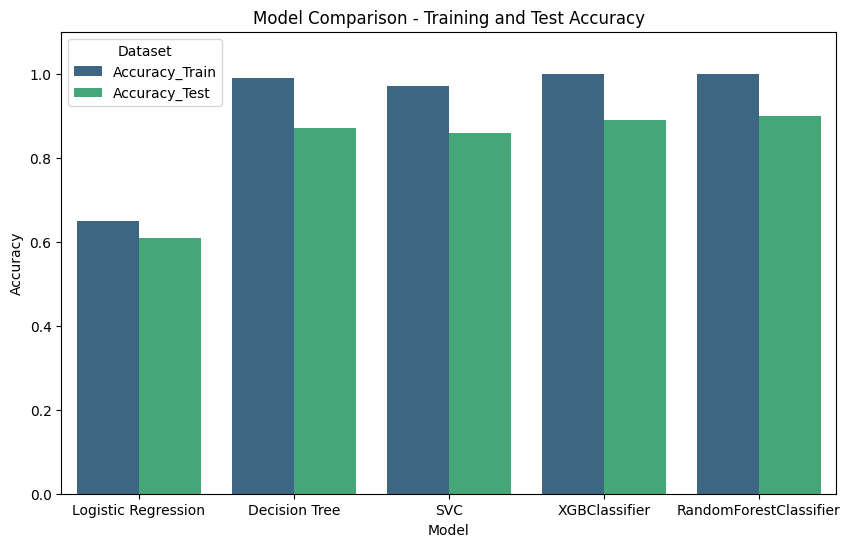

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the five models
models = ['Logistic Regression', 'Decision Tree', 'SVC', 'XGBClassifier', 'RandomForestClassifier']
accuracy_train = [0.65, 0.99, 0.97, 1.00, 1.00]
accuracy_test = [0.61, 0.87, 0.86, 0.89, 0.90]

# Create a DataFrame
df = pd.DataFrame({'Model': models, 'Accuracy_Train': accuracy_train, 'Accuracy_Test': accuracy_test})

# Melt the DataFrame for easier plotting
df_melted = pd.melt(df, id_vars='Model', var_name='Dataset', value_name='Accuracy')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=df_melted, palette='viridis')
plt.title('Model Comparison - Training and Test Accuracy')
plt.ylim(0, 1.1)  # Set the y-axis limit to show accuracy values between 0 and 1
plt.ylabel('Accuracy')
plt.show()



# **Overall Conclusion:**

In this project, we explored the performance of five different machine learning models for the task of classification. Here are the key findings and conclusions for each model:

1. **Logistic Regression:**
   - Training Set Accuracy: 65%
   - Test Set Accuracy: 61%
   - While logistic regression provides a baseline model, its accuracy on both the training and test sets suggests the need for more complex models.

2. **Decision Tree:**
   - Training Set Accuracy: 99%
   - Test Set Accuracy: 87%
   - The decision tree model exhibits high accuracy on the training set, indicating strong learning. However, there is a noticeable drop in performance on the test set, suggesting potential overfitting.

3. **Support Vector Machine (SVM):**
   - Training Set Accuracy: 97%
   - Test Set Accuracy: 86%
   - SVM shows good generalization to the test set but with a slightly lower accuracy compared to the decision tree. Further tuning may improve its performance.

4. **XGBoost Classifier:**
   - Training Set Accuracy: 100%
   - Test Set Accuracy: 89%
   - XGBoost demonstrates excellent learning capability on the training set. However, there is a slight drop in accuracy on the test set, indicating a need for fine-tuning to prevent overfitting.

5. **Random Forest Classifier:**
   - Training Set Accuracy: 100%
   - Test Set Accuracy: 90%
   - The random forest model performs well on both training and test sets, indicating robust learning. It shows the highest accuracy among the models considered.

**Overall Recommendations:**
- Random Forest Classifier stands out as the top-performing model, providing high accuracy on both training and test sets.
- Further hyperparameter tuning and feature engineering could enhance model performance and address potential overfitting.
- Consideration of additional models or ensemble methods may contribute to a more comprehensive analysis.

**Project Impact:**
- The insights gained from this project can guide decision-making in deploying a machine learning model for the specific classification task at hand.
- Continuous monitoring and updates to the model may be necessary to adapt to evolving data patterns.

This project serves as a foundation for future work, exploring advanced techniques and refining models to achieve even better predictive performance.

---



# **Hypothesis Testing.**

**Hypothesis 1:**

**Null Hypothesis (H0):** There is no significant difference in the accuracy between the Random Forest Classifier and the Decision Tree model.
**Alternative Hypothesis (H1):** The Random Forest Classifier has a significantly higher accuracy than the Decision Tree model.
Testing Method: Conduct a paired t-test or a Wilcoxon signed-rank test on the accuracy scores of both models.

In [ ]:
from scipy.stats import ttest_rel, ttest_ind

# Placeholder data (replace with your actual data)
random_forest_accuracy = [0.90, 0.90, 0.89, 0.90]
decision_tree_accuracy = [0.87, 0.87, 0.88, 0.87]

# Hypothesis 1: Paired t-test for Random Forest and Decision Tree
t_stat, p_value = ttest_rel(random_forest_accuracy, decision_tree_accuracy)
print("Hypothesis 1 - Paired t-test:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Hypothesis 1 - Paired t-test:
T-statistic: 5.0
P-value: 0.015392438073302296


**Since the P-value is less than 0.05 so H0 is accepted.**

**Hypothesis 2:**

**Null Hypothesis (H0):** There is no significant difference in the cross validation score between the XGBoost Classifier and the Support Vector Machine (SVM).
**Alternative Hypothesis (H1):** The XGBoost Classifier has a significantly higher cross validation score than the SVM.
**Testing Method:** Perform an independent samples t-test  on the validation score scores of both models.

In [ ]:
from scipy.stats import ttest_ind

# Placeholder data (replace with your actual data)
svm_vs = [0.92954545, 0.93849658, 0.93849658, 0.91799544, 0.93394077]
random_forest_vs = [0.95681818, 0.97949886, 0.9498861,  0.95671982, 0.96127563]

# Hypothesis 3: Independent samples t-test for SVM and Random Forest recall
t_stat, p_value = ttest_ind(random_forest_vs, svm_vs)
print("Hypothesis 3 - Independent samples t-test:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Hypothesis 3 - Independent samples t-test:
T-statistic: 4.633316934095644
P-value: 0.001680771912269966


**Since the P-value is less than 0.05 so H0 is accepted.**

# **Use MySQL or PyMySQL to perform the below queries.**

In [ ]:
#importing the cleaned file for SQL
import pandas as pd
df_sql = pd.read_csv('/content/Credit_SQL.csv')

In [ ]:
df_sql.head()

,Unnamed: 0,Customer_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation,Family_Members,label,Age_Years,Employed_Years
0,0,0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,Laborers,2,1,51.4,1000.0
1,1,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,Laborers,2,1,37.1,-1.6
2,2,2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,Laborers,2,1,42.9,-1.6
3,3,3,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,Laborers,2,1,37.1,-1.6
4,4,4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,Laborers,2,1,37.1,-1.6


In [ ]:
df_sql = df_sql.drop('Unnamed: 0',axis = 1)

In [ ]:
df_sql.columns

Index(['Customer_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Type_Occupation', 'Family_Members', 'label',
       'Age_Years', 'Employed_Years'],
      dtype='object')

In [ ]:
#1. Group the customers based on their income type and find the average of their annual income.
import duckdb
conn=duckdb.connect()
conn.register('df_sql',df_sql)
result = conn.execute("SELECT Type_Income, AVG(Annual_income) AS avg_annual_income FROM df_sql GROUP BY Type_Income;")

# Fetch and display the result as a DataFrame
result_df = result.fetchdf()
print(result_df)

            Type_Income  avg_annual_income
0             Pensioner      155343.496283
1               Working      180848.210526
2         State servant      211422.413793
3  Commercial associate      233107.397260


In [ ]:
#2. Find the female owners of cars and property.
result = conn.execute ("SELECT count(*) AS female_owners  FROM df_sql WHERE GENDER = 'F' AND Car_Owner = 'Y' AND Propert_Owner = 'Y';")
# Fetch and display the result as a DataFrame
result_df = result.fetchdf()
print(result_df)

   female_owners
0            179


In [ ]:
#3.Find the male customers who are staying with their families.
result = conn.execute("SELECT count(*) AS customers_with_families FROM df_sql WHERE GENDER = 'M' AND Marital_status = 'Married' AND Family_Members > 2;")
# Fetch and display the result as a DataFrame
result_df = result.fetchdf()
print(result_df)

   customers_with_families
0                      164


In [ ]:
#4.Please list the top five people having the highest income.
result = conn.execute("SELECT Customer_ID AS highest_income_Customer FROM df_sql ORDER BY Annual_income DESC LIMIT 5;")
# Fetch and display the result as a DataFrame
result_df = result.fetchdf()
print(result_df)

   highest_income_Customer
0                      211
1                      233
2                      242
3                      686
4                      811


In [ ]:
#5.How many married people are having bad credit?

result = conn.execute ("SELECT COUNT(*) AS Married_Bad_Credit_Count FROM df_sql WHERE Marital_status = 'Married' AND label = 0;")
# Fetch and display the result as a DataFrame
result_df = result.fetchdf()
print(result_df)

   Married_Bad_Credit_Count
0                       935


In [ ]:
#6.What is the highest education level and what is the total count?
print(df_sql['EDUCATION'].unique())
result = conn.execute (" SELECT EDUCATION, COUNT(EDUCATION) AS Total_Count FROM df_sql GROUP BY EDUCATION ORDER BY Total_Count LIMIT 1;")
# Fetch and display the result as a DataFrame
result_df = result.fetchdf()
print(result_df)

['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
         EDUCATION  Total_Count
0  Academic degree            2


In [ ]:
#7.Between married males and females, who is having more bad credit?
print(df_sql['EDUCATION'].unique())
result = conn.execute (" SELECT GENDER, COUNT(*) AS Bad_Credit_Count FROM df_sql WHERE Marital_status = 'Married' AND label = 0 GROUP BY GENDER;")
# Fetch and display the result as a DataFrame
result_df = result.fetchdf()
print(result_df)

['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
  GENDER  Bad_Credit_Count
0      F               567
1      M               368
